<a href="https://colab.research.google.com/github/aa05420/Coal-Mine-Warning-and-Monitoring-System/blob/main/Compiled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING LIBRARIES 


In [ ]:
#                      MOBILE NET MODEL 

import os
import cv2
import numpy as np
import keras
import tensorflow as tf
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Input, Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, concatenate
from sklearn.model_selection import train_test_split
from keras.models import Sequential
NUM_CLASSES = 2
NUM_EPOCHS = 20
WEIGHT_DECAY = 5e-4
BATCH_SIZE = 32

IMG_HEIGHT = 224
IMG_WIDTH  = 224

#dir = '/content/drive/MyDrive/Mine_Data/subtropolis_roof_images'

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

    
# # extract the image array and class name
img_data, class_name =create_dataset(r'/content/drive/MyDrive/MineData')
#
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
x=np.array(img_data, np.float32)
y=np.array(list(map(int,target_val)), np.float32)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model = tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=2,
    classifier_activation="sigmoid"
  
)

print(model.summary())

model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.1, momentum=0.9), metrics=['accuracy'])

tensorboard = keras.callbacks.TensorBoard(log_dir='googlenet')

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_split=0.10, callbacks=[tensorboard])

score = model.evaluate(X_test, y_test)
print('\nTest accuracy: {0:.4f}'.format(score[1]))

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 16s 217ms/step - loss: 1.9900 - accuracy: 0.6233 - val_loss: 3.1506 - val_accuracy: 0.2687
Epoch 2/20
19/19 [==============================] - 3s 150ms/step - loss: 1.4120 - accuracy: 0.6783 - val_loss: 1.9979 - val_accuracy: 0.7313
Epoch 3/20
19/19 [==============================] - 3s 149ms/step - loss: 0.7902 - accuracy: 0.7900 - val_loss: 2.6460 - val_accuracy: 0.2687
Epoch 4/20
19/19 [==============================] - 3s 152ms/step - loss: 0.4607 - accuracy: 0.8383 - val_loss: 24.5897 - val_accuracy: 0.2687
Epoch 5/20
19/19 [==============================] - 3s 162ms/step - loss: 0.4234 - accuracy: 0.8383 - val_loss: 31.0510 - val_accuracy: 0.2687
Epoch 6/20
19/19 [==============================] - 3s 164ms/step - loss: 0.4930 - accuracy: 0.8450 - val_loss: 0.5782 - val_accuracy: 0.7313
Epoch 7/20
19/19 [==============================] - 3s 152ms/step - loss: 0.5857 - accuracy: 0.8450 - val_loss: 7.6335 - val_accuracy: 0.2836
Epo

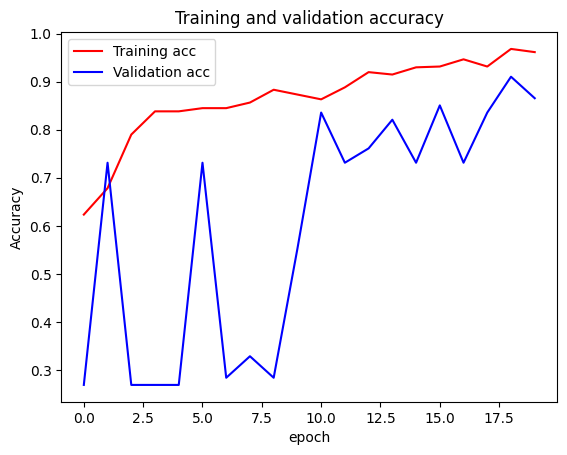

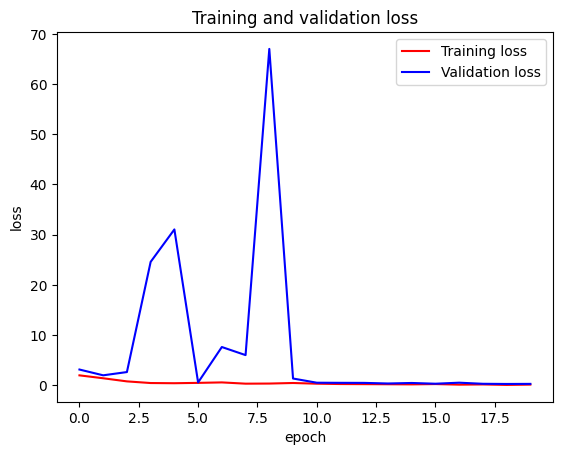

In [ ]:
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()


In [ ]:
model.save('model.h5')



In [ ]:
# RUNNING MODEL ON IMAGES 
import os
import cv2
import numpy as np
from keras.models import load_model

# Load your trained model
model = load_model('/content/model.h5')

# Set the input shape expected by your model
input_shape = model.input_shape[1:3]
class_labels = ['Hazardous', 'NonHazardous']
# Loop through your image folder and preprocess each image
for filename in os.listdir('/content/drive/MyDrive/Colab Notebooks/TestImages'):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join('/content/drive/MyDrive/Colab Notebooks/TestImages', filename))

    # Resize the image to match the input shape of your model
    img = cv2.resize(img, input_shape)

    # Convert the image to floats
    img = img.astype('float32')

    # Normalize the pixel values
    img /= 255.0

    # Add an extra dimension to the image to match the input shape of your model
    img = np.expand_dims(img, axis=0)

    # Pass the preprocessed image to your model for prediction
    pred = model.predict(img)

    # Do something with the prediction

    class_idx = np.argmax(pred)
    label = class_labels[class_idx]

    # Print the label for the current image
    print(f"Image '{filename}' belongs to class '{label}'")
   


1/1 [==============================] - 1s 709ms/step
Image '50_0.tif' belongs to class 'Hazardous'
1/1 [==============================] - 0s 20ms/step
Image '50_1.tif' belongs to class 'Hazardous'
1/1 [==============================] - 0s 22ms/step
Image '41_0.tif' belongs to class 'Hazardous'
1/1 [==============================] - 0s 20ms/step
Image '41_1.tif' belongs to class 'Hazardous'
1/1 [==============================] - 0s 20ms/step
Image '31_0.tif' belongs to class 'Hazardous'
1/1 [==============================] - 0s 20ms/step
Image '21_1.tif' belongs to class 'NonHazardous'
1/1 [==============================] - 0s 19ms/step
Image '71_1.tif' belongs to class 'NonHazardous'
1/1 [==============================] - 0s 23ms/step
Image '20_1.tif' belongs to class 'NonHazardous'
